In [90]:
import pandas as pd
import numpy as np
import seaborn as sb
import time
pd.options.mode.chained_assignment = None

In [91]:
jobsdata = pd.read_csv('C:/Users/srika/Desktop/potfolio/Jobs/jobs.csv')

In [92]:
jobsdata.isnull().sum()

jobsdata.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [106]:
import matplotlib.pyplot as plt

1 - Following graph is representation of Job market division based on the job catagories

C:\Users\srika\AppData\Local\Temp\ipykernel_15188\4069415169.py:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



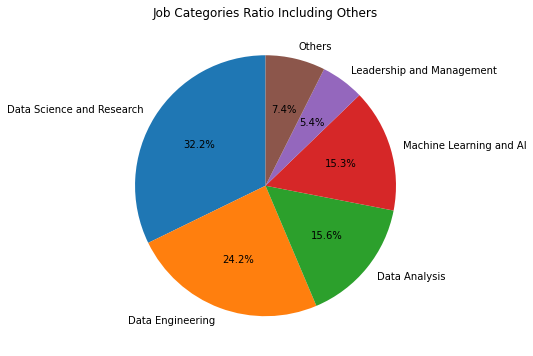

In [108]:
category_counts = jobsdata['job_category'].value_counts()

top_categories = category_counts.head(5)

remaining_categories = category_counts.iloc[5:]
others_category = pd.Series(remaining_categories.sum(), index=['Others'])

combined_categories = top_categories.append(others_category)

plt.figure(figsize=(6,6))
plt.pie(combined_categories, labels=combined_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Categories Ratio Including Others')
plt.show()

2 - Following graph is representation of percentage of based on the level of experties

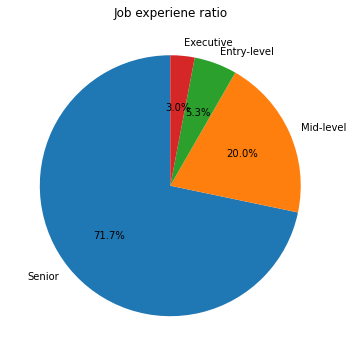

In [110]:
expcounts = jobsdata['experience_level'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(expcounts, labels=expcounts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job experiene ratio')
plt.show()

3 - Following graph is representation to show which has the most number of jobs

C:\Users\srika\AppData\Local\Temp\ipykernel_15188\2291981989.py:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



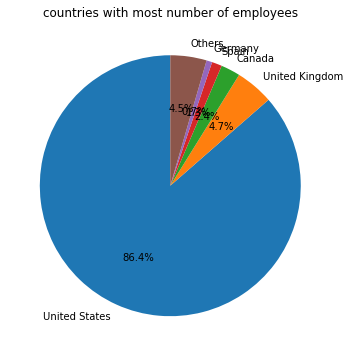

In [111]:
empresidence = jobsdata['employee_residence'].value_counts()

top_countries = empresidence.head(5)

remaining_countries = empresidence.iloc[5:]
others_countries = pd.Series(remaining_countries.sum(), index=['Others'])

combined_countries = top_countries.append(others_countries)

plt.figure(figsize=(6,6))
plt.pie(combined_countries, labels=combined_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('countries with most number of employees')
plt.show()

4 - Following graph is representation of avg salary for top 10 jab catagories

In [97]:
jobs_and_salaries = jobsdata.groupby('job_category')['salary_in_usd'].mean().reset_index()
sorted_jobs = jobs_and_salaries.sort_values(by='salary_in_usd', ascending=False)

# Use Plotly Express for an interactive bar graph
fig = px.bar(sorted_jobs.head(10), x='job_category', y='salary_in_usd', title='Top 10 Jobs and their Average Salaries',
             labels={'Jobs': 'Job', 'Salaries': 'Average Salary'}, color='job_category')

fig.update_xaxes(tickvals=[], ticktext=[])
# Show the interactive graph
fig.show()

Graph to show count of type of jobs in each job catagory

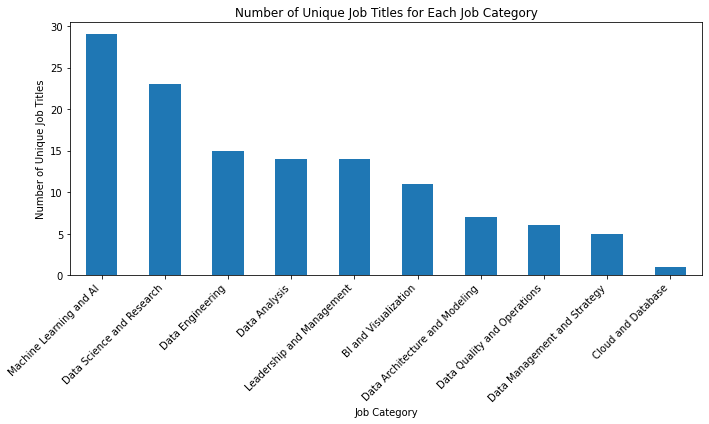

In [98]:
job_titles_count = jobsdata.groupby('job_category')['job_title'].nunique()

# Sort the job categories based on the count of unique job titles
job_titles_count_sorted = job_titles_count.sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
job_titles_count_sorted.plot(kind='bar')

# Customize the plot
plt.title('Number of Unique Job Titles for Each Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Unique Job Titles')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Change rate of pay from 2020 to 2023 for each job catagory

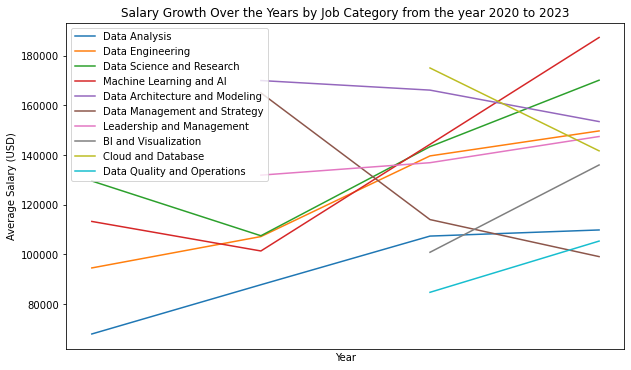

In [112]:
jobsdata['work_year'] = pd.to_datetime(jobsdata['work_year'])

# Extract the year from the 'work_date' column and create a new 'year' column
jobsdata['year'] = jobsdata['work_year']

# Group by 'year' and 'job_category', calculate the average salary for each group
grouped_data = jobsdata.groupby(['year', 'job_category'])['salary_in_usd'].mean().reset_index()
# Plotting the line graph
plt.figure(figsize=(10, 6))

# Iterate over unique job categories and plot a line for each
for job_category in grouped_data['job_category'].unique():
    subset = grouped_data[grouped_data['job_category'] == job_category]
    mp.plot(subset['year'], subset['salary_in_usd'], label=job_category)

# Customize the plot
plt.title('Salary Growth Over the Years by Job Category from the year 2020 to 2023')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

Top 20 job titles and number of emplyees working with that title

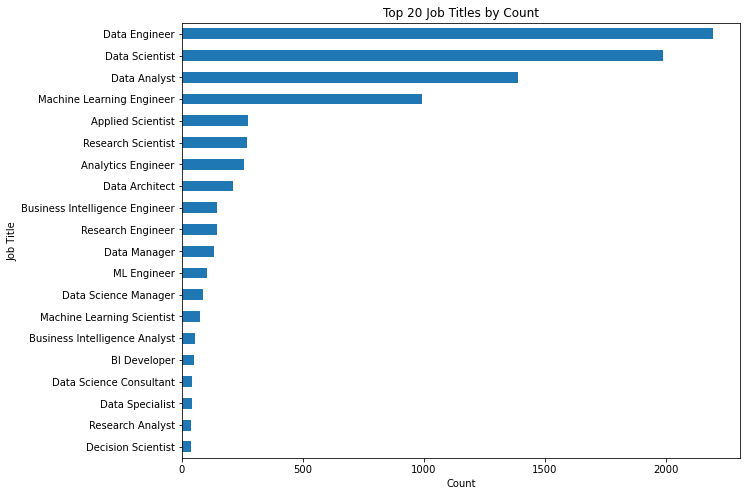

In [100]:
job_counts = jobsdata['job_title'].value_counts()

# Sort the job counts in descending order
job_counts_sorted = job_counts.sort_values(ascending=False)

# Limit to top 20 job titles
job_counts_top20 = job_counts_sorted.head(20)

# Reverse the order of the Series
job_counts_top20 = job_counts_top20[::-1]

# Plotting the bar graph
plt.figure(figsize=(10, 8))

# Plotting the bar graph
job_counts_top20.plot(kind='barh')

# Customize the plot
plt.title('Top 20 Job Titles by Count')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Show the plot
plt.show()

Count of Employees by Work Setting and Company Size

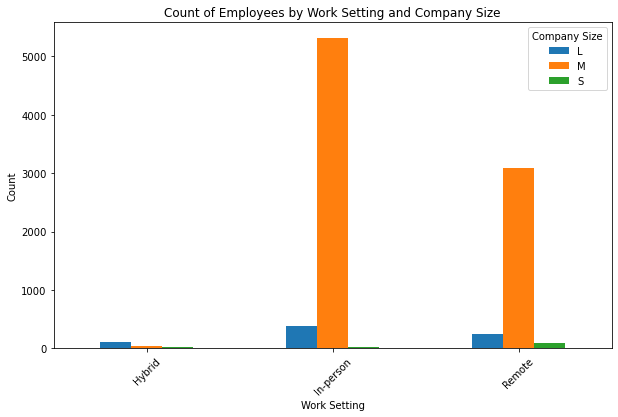

In [101]:
grouped_data = jobsdata.groupby(['work_setting', 'company_size']).size().unstack()

# Plotting the grouped bar plot
grouped_data.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Count of Employees by Work Setting and Company Size')
plt.xlabel('Work Setting')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Company Size')

# Show the plot
plt.show()

In [102]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [103]:
import geopandas as gpd

Top 10 Countries by Count of Employees

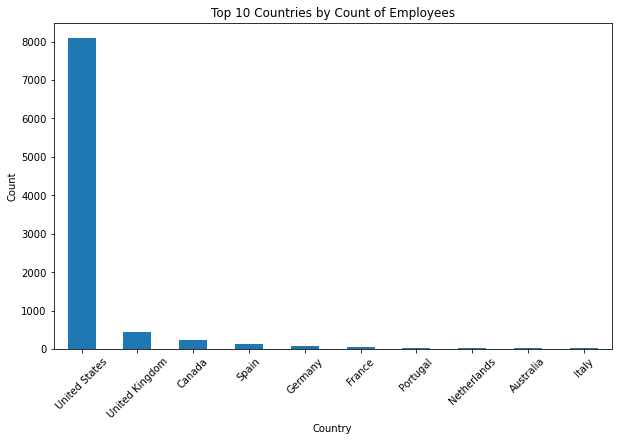

In [104]:
employee_counts = jobsdata['employee_residence'].value_counts()

# Sort the data by count in descending order
employee_counts_sorted = employee_counts.sort_values(ascending=False)

# Select only the top ten countries
top_ten_employee_counts = employee_counts_sorted.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_ten_employee_counts.plot(kind='bar')
plt.title('Top 10 Countries by Count of Employees')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Employee Density Map by Country (Top 10)

C:\Users\srika\AppData\Local\Temp\ipykernel_15188\69366838.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



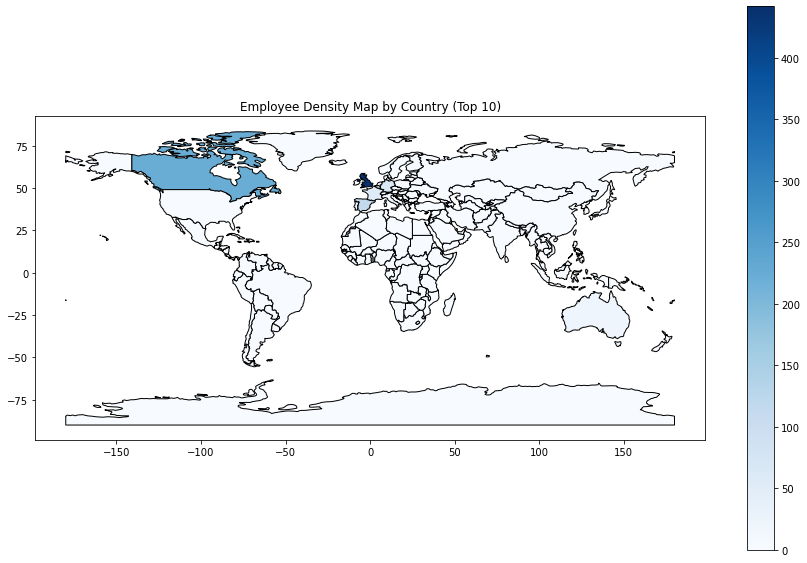

In [87]:
employee_counts = jobsdata['employee_residence'].value_counts()

# Sort the data by count in descending order and select only the top ten countries
top_ten_countries = employee_counts.head(10)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge employee counts with world map data
world = world.merge(top_ten_countries, how='left', left_on='name', right_index=True)

# Fill NaN values with 0 (for countries with no employees)
world['employee_count'] = world['employee_residence'].fillna(0)

# Normalize the data for better color representation
norm = Normalize(vmin=world['employee_count'].min(), vmax=world['employee_count'].max())

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='employee_count', ax=ax, legend=True, cmap='Blues', edgecolor='k', norm=norm)
ax.set_title('Employee Density Map by Country (Top 10)')
plt.show()

Density of Companies by Country and Company Size

C:\Users\srika\AppData\Local\Temp\ipykernel_15188\4238141664.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



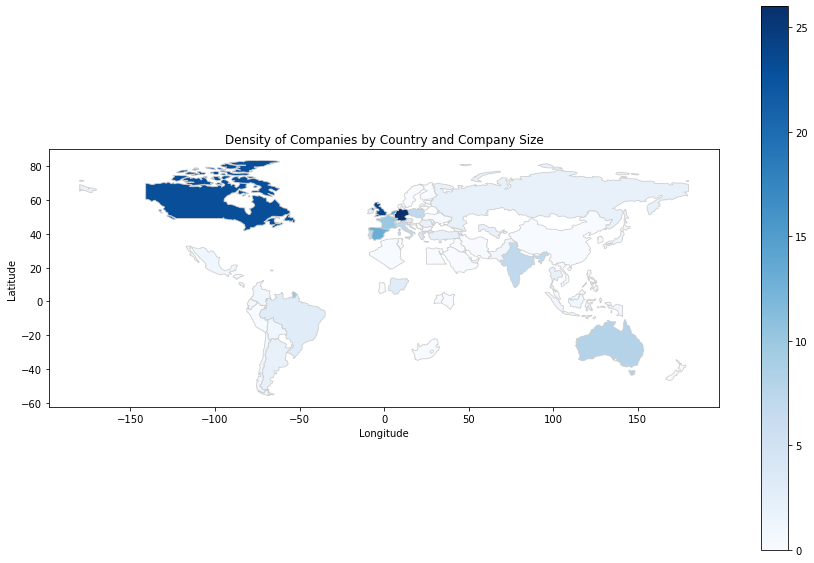

In [105]:
company_counts = jobsdata.groupby(['employee_residence', 'company_size']).size().unstack(fill_value=0)

# Merge company counts with world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(company_counts, how='left', left_on='name', right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='L', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Density of Companies by Country and Company Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

Average Salary by Country

C:\Users\srika\AppData\Local\Temp\ipykernel_15188\2413805181.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



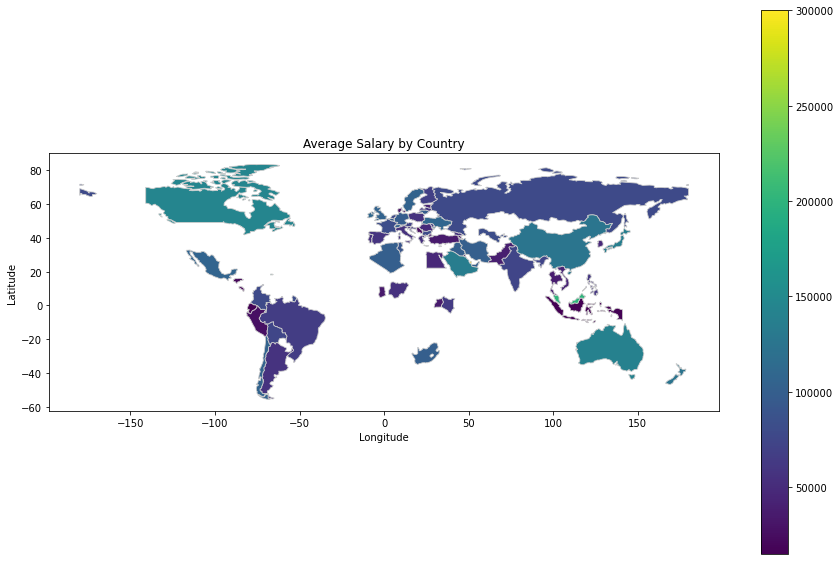

In [76]:

# Assuming you have already loaded your data into a DataFrame named 'data'

# Group the data by country and calculate the average salary
avg_salary_by_country = jobsdata.groupby('employee_residence')['salary_in_usd'].mean()

# Merge average salary with world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(avg_salary_by_country, how='left', left_on='name', right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='salary_in_usd', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Average Salary by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()